# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy



### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_weather_json = city_weather.json()
    
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
       
        city_lat = city_weather_json["coord"]["lat"]
        city_lng = city_weather_json["coord"]["lon"]
        city_max_temp = city_weather_json["main"]["temp_max"]
        city_humidity = city_weather_json["main"]["humidity"]
        city_clouds = city_weather_json["clouds"]["all"]
        city_wind = city_weather_json["wind"]["speed"]
        city_country = city_weather_json["sys"]["country"]
        city_date = city_weather_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cacequi
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | al jawf
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | vallenar
Processing Record 6 of Set 1 | thompson
Processing Record 7 of Set 1 | labytnangi
Processing Record 8 of Set 1 | dudinka
Processing Record 9 of Set 1 | margaret river
Processing Record 10 of Set 1 | felidhoo
City not found. Skipping...
Processing Record 11 of Set 1 | port elizabeth
Processing Record 12 of Set 1 | gadzhiyevo
Processing Record 13 of Set 1 | iqaluit
Processing Record 14 of Set 1 | sur
Processing Record 15 of Set 1 | grytviken
Processing Record 16 of Set 1 | isafjordur
Processing Record 17 of Set 1 | guerrero negro
Processing Record 18 of Set 1 | egilsstadir
Processing Record 19 of Set 1 | olonkinbyen
Processing Record 20 of Set 1 | kone
Processing Record 21 of Set 1 | college
Processing Record 22 of Set 1 | sin

In [5]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cacequi,-29.8836,-54.8250,284.79,94,100,9.09,BR,1697075091
1,port-aux-francais,-49.3500,70.2167,274.71,94,100,3.95,TF,1697075091
2,al jawf,29.5000,38.7500,292.91,51,0,3.87,SA,1697075091
3,ushuaia,-54.8000,-68.3000,277.96,75,75,12.52,AR,1697075092
4,vallenar,-28.5708,-70.7581,292.08,36,0,0.37,CL,1697075092


In [25]:
#Convert Kelvin to Fahrenheight

city_data_df["Max Temp"]=((city_data_df["Max Temp"] - 273.15) * 1.8) + 32
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cacequi,-29.8836,-54.8250,52.952,94,100,9.09,BR,1697075091
1,port-aux-francais,-49.3500,70.2167,34.808,94,100,3.95,TF,1697075091
2,al jawf,29.5000,38.7500,67.568,51,0,3.87,SA,1697075091
3,ushuaia,-54.8000,-68.3000,40.658,75,75,12.52,AR,1697075092
4,vallenar,-28.5708,-70.7581,66.074,36,0,0.37,CL,1697075092


In [26]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [4]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cacequi,-29.8836,-54.8250,52.952,94,100,9.09,BR,1697075091
1,port-aux-francais,-49.3500,70.2167,34.808,94,100,3.95,TF,1697075091
2,al jawf,29.5000,38.7500,67.568,51,0,3.87,SA,1697075091
3,ushuaia,-54.8000,-68.3000,40.658,75,75,12.52,AR,1697075092
4,vallenar,-28.5708,-70.7581,66.074,36,0,0.37,CL,1697075092


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

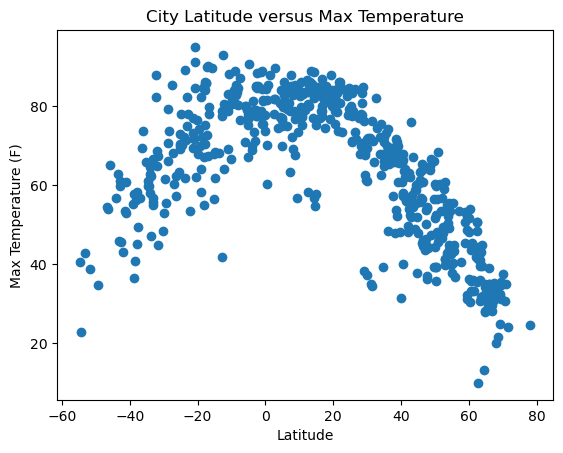

In [5]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])


# Incorporate the other graph properties
plt.title("City Latitude versus Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

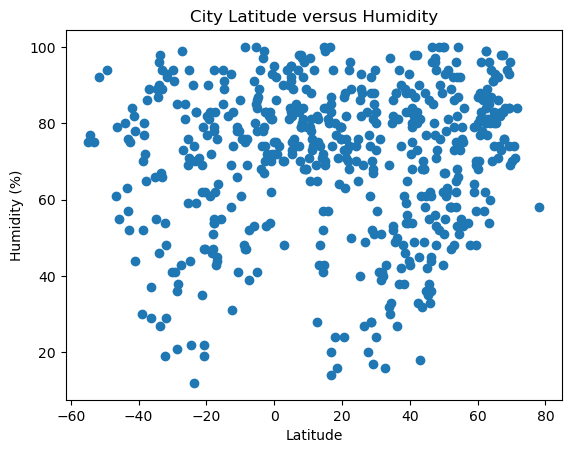

In [16]:
# Build the scatter plots for latitude vs. humidity

lat = city_data_df["Lat"]
hum = city_data_df["Humidity"]
plt.scatter(lat, hum)


# Incorporate the other graph properties
plt.title("City Latitude versus Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

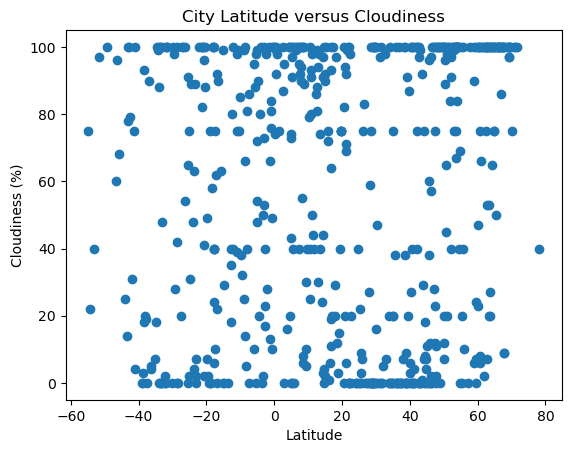

In [17]:
# Build the scatter plots for latitude vs. cloudiness
lat = city_data_df["Lat"]
clouds = city_data_df["Cloudiness"]
plt.scatter(lat, clouds)

# Incorporate the other graph properties
plt.title("City Latitude versus Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

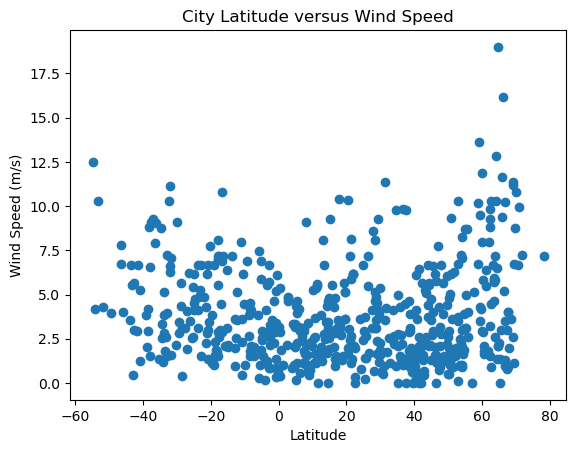

In [18]:
# Build the scatter plots for latitude vs. wind speed
lat = city_data_df["Lat"]
wind = city_data_df["Wind Speed"]
plt.scatter(lat, wind)

# Incorporate the other graph properties
plt.title("City Latitude versus Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [2]:
# Define a function to create Linear Regression plots

def linearplot(x, y, x_, y_):
    plt.scatter(x, y)


    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    plt.plot(x, regress_values, color="red")
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq, (x_, y_), color = "red", fontsize = 15)
    plt.xlabel("Latitude")
    plt.ylabel(y.name)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [5]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >=0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,al jawf,29.5000,38.7500,67.568,51,0,3.87,SA,1697075091
5,thompson,55.7435,-97.8558,44.762,53,40,2.57,CA,1697075092
6,labytnangi,66.6572,66.4183,33.098,82,100,1.32,RU,1697075092
7,dudinka,69.4058,86.1778,34.682,93,100,6.71,RU,1697075092
10,gadzhiyevo,69.2551,33.3362,32.000,84,97,11.20,RU,1697075092


In [6]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cacequi,-29.8836,-54.8250,52.952,94,100,9.09,BR,1697075091
1,port-aux-francais,-49.3500,70.2167,34.808,94,100,3.95,TF,1697075091
3,ushuaia,-54.8000,-68.3000,40.658,75,75,12.52,AR,1697075092
4,vallenar,-28.5708,-70.7581,66.074,36,0,0.37,CL,1697075092
8,margaret river,-33.9500,115.0667,62.906,46,0,2.83,AU,1697075092


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7564708153720329


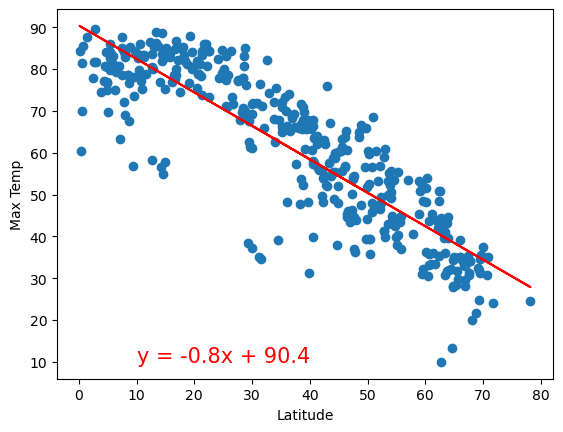

In [7]:
# Linear regression on Northern Hemisphere


x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]
linearplot(x, y, 10, 10)

The r-value is: 0.5141478946376175


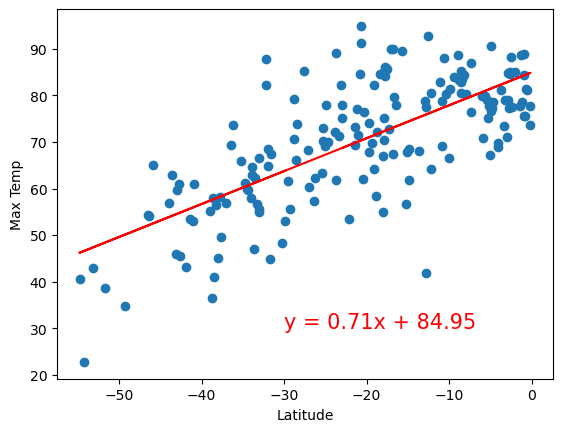

In [16]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]
linearplot(x, y, -30, 30)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0004931671039115404


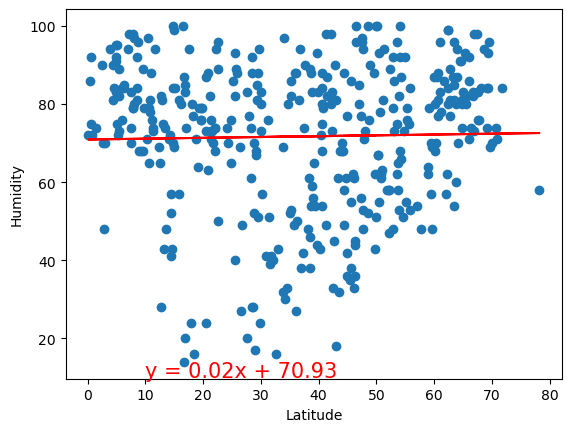

In [8]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]
linearplot(x, y, 10, 10)

The r-value is: 0.012613103329878635


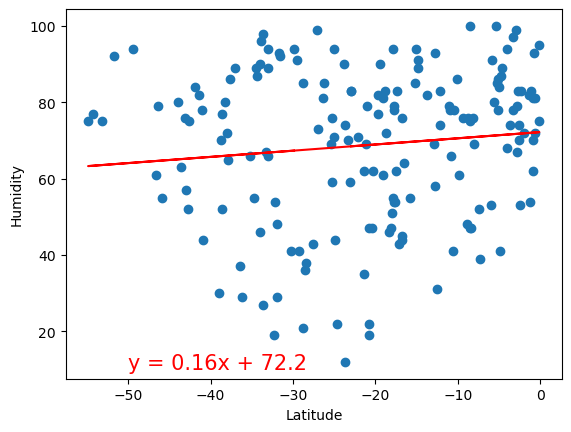

In [11]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]
linearplot(x, y, -50, 10)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.015152884913004877


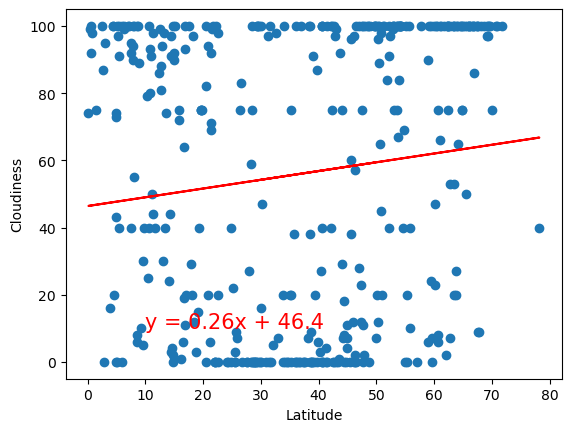

In [12]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]
linearplot(x, y, 10, 10)

The r-value is: 0.004941415430731578


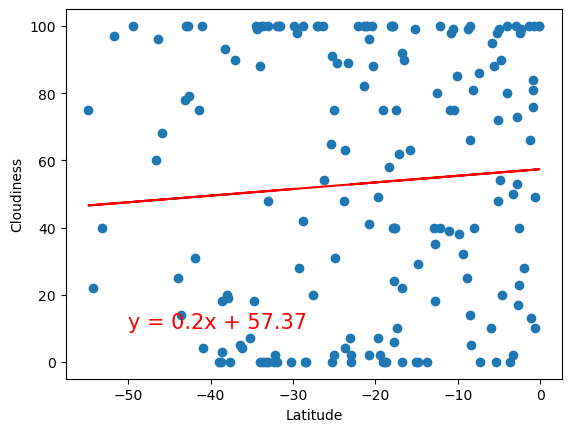

In [13]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]
linearplot(x, y, -50, 10)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.07031805199897247


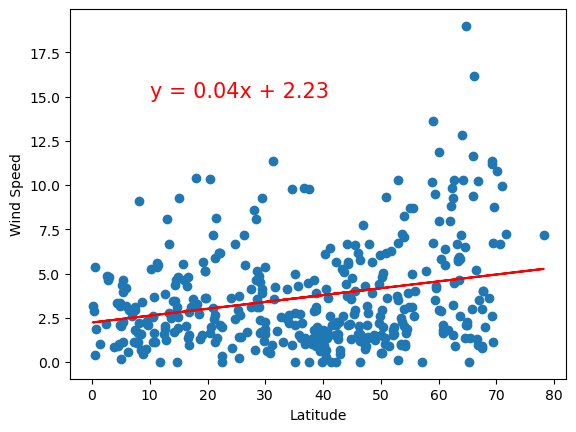

In [15]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]
linearplot(x, y, 10, 15)

The r-value is: 0.10756724244513385


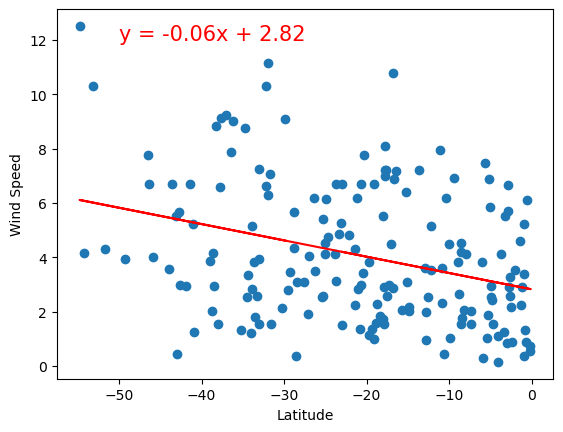

In [17]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]
linearplot(x, y, -50, 12)

**Discussion about the linear relationship:** YOUR RESPONSE HERE